<h2 align='center'> Boston Housing Dataset </h2>

### Objective 

The objective of the dataset is  to predict the median value of owner-occupied homes

### About the Data
This database contains 14 attributes. The target variable refers to the median value of owner-occupied homes in 1000 USD's

#### Data Description :

- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centres
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 USD
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: lower status of the population (%)
- MEDV: Median value of owner-occupied homes in 1000 USD's

### Evaluation Criteria
Submissions are evaluated using Root-Mean-Squared-Error (RMSE). 

#### Acknowledgement
This dataset has been sourced from the Kaggle.

#### Import pandas, numpy, seaborn, matplotlib.pyplot packages

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Boston_Housing/Training_set_boston.csv" )
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,12.0
1,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,19.9
2,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,19.4
3,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,13.4
4,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,18.2


### Inspecting Data

In [3]:
df.shape

(404, 14)

- Training Dataset comprises 404 observations(rows) and 14 features(columns).
- Out of the 14, one is the target variable and rest 13 are input variables.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


- The data has only float values.
- There are no missing values

In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Statistical Summary
- Get a Statistical Overview using Describe

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,3.609125,8.875058,0.00906,0.081437,0.26139,3.202962,88.9762
ZN,404.0,11.569307,23.152481,0.00000,0.000000,0.00000,20.000000,100.0000
INDUS,404.0,10.985050,6.894618,0.74000,5.130000,8.56000,18.100000,27.7400
CHAS,404.0,0.071782,0.258447,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,404.0,0.556484,0.117704,0.38500,0.452000,0.53800,0.631000,0.8710
RM,404.0,6.315891,0.709452,3.86300,5.890500,6.21000,6.636750,8.7800
AGE,404.0,68.556436,27.994922,2.90000,45.550000,77.70000,93.650000,100.0000
DIS,404.0,3.808195,2.131226,1.12960,2.087875,3.17575,5.400800,12.1265
RAD,404.0,9.356436,8.589721,1.00000,4.000000,5.00000,12.000000,24.0000
TAX,404.0,404.032178,166.172655,187.00000,279.000000,330.00000,666.000000,711.0000


### Inference:
- The CRIM, ZN, RAD, TAX, LSTAT attributes(predictors) has **large difference between 75th %tile and max values** .
- ZN, TAX, AGE, has a **large difference between Mean and Median values**

Thus, the observation suggest that there are extreme values i.e Outliers in our dataset.


<hr>

## Exploratory Data Analysis (EDA)


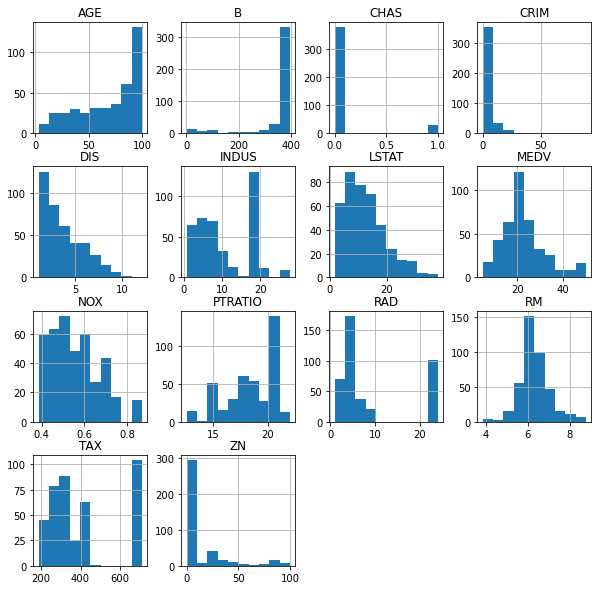

In [7]:
df.hist(figsize=(10,10))
plt.show()

### Inference :
- The distribution of the attribute “LSTAT”, "NOX" seems to be positively skewed i.e the curve is shifted towards the left.
- The attributes 'RM' and 'MEDV' are quite normally distributed.

### Outlier Detection

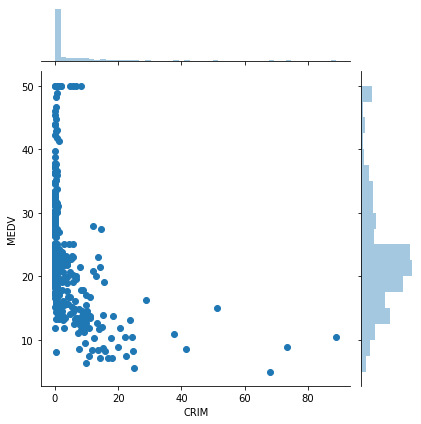

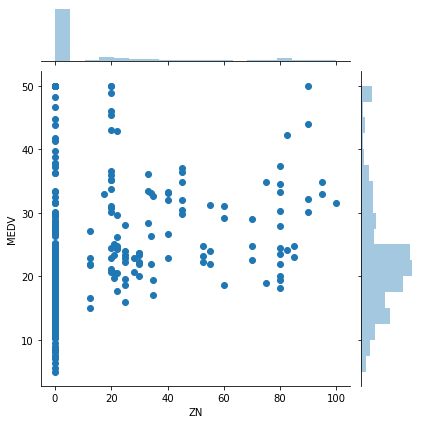

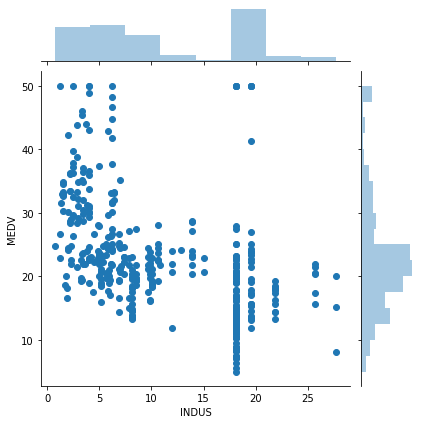

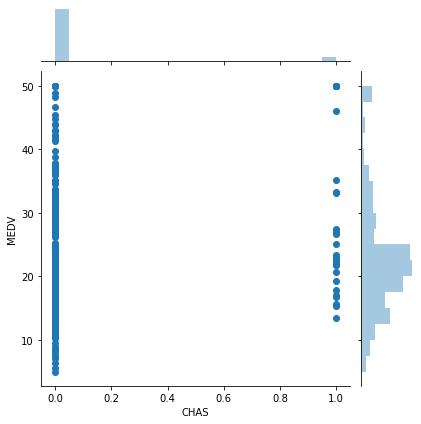

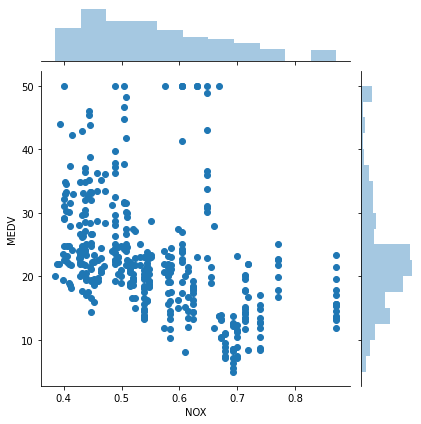

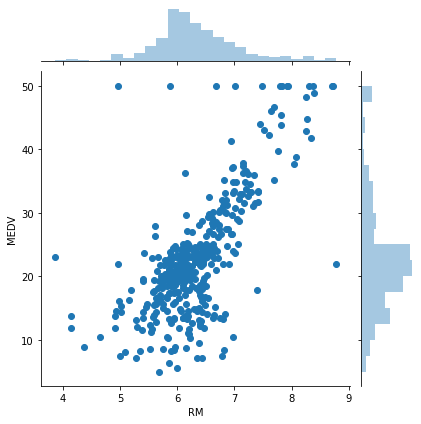

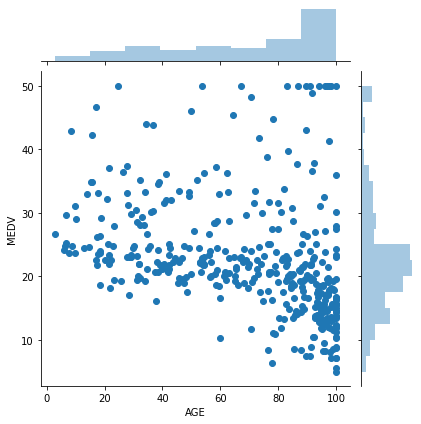

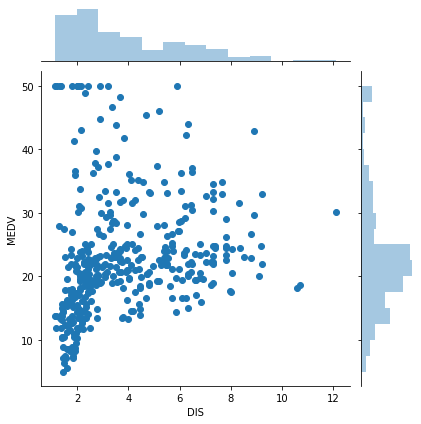

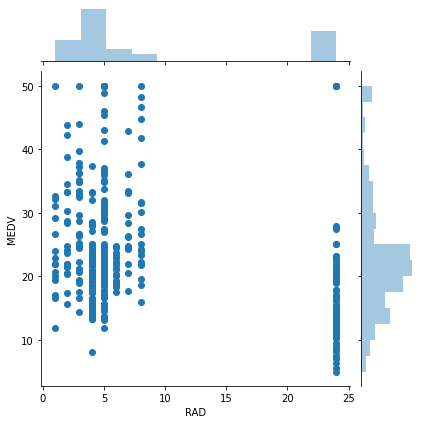

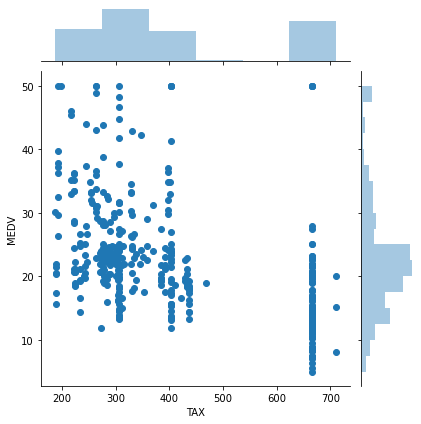

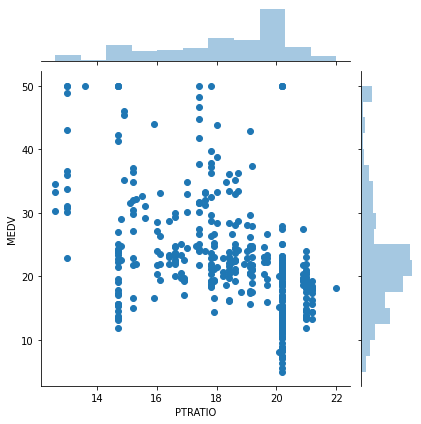

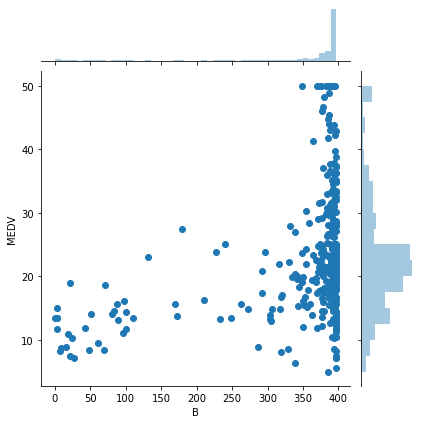

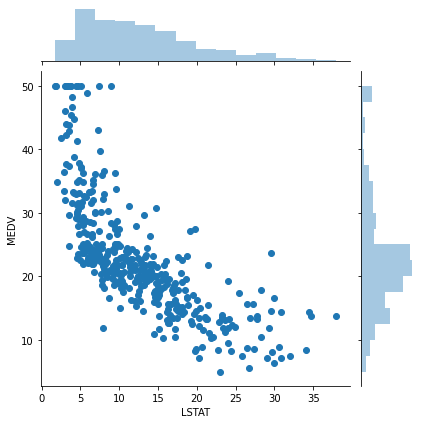

In [8]:
col = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

for i in col:
    #sns.boxplot(df[i])
    sns.jointplot(df[i], df.MEDV, data= df)
    plt.show()

- CRIM seems to have some outlier. 

###  Correlation Matrix

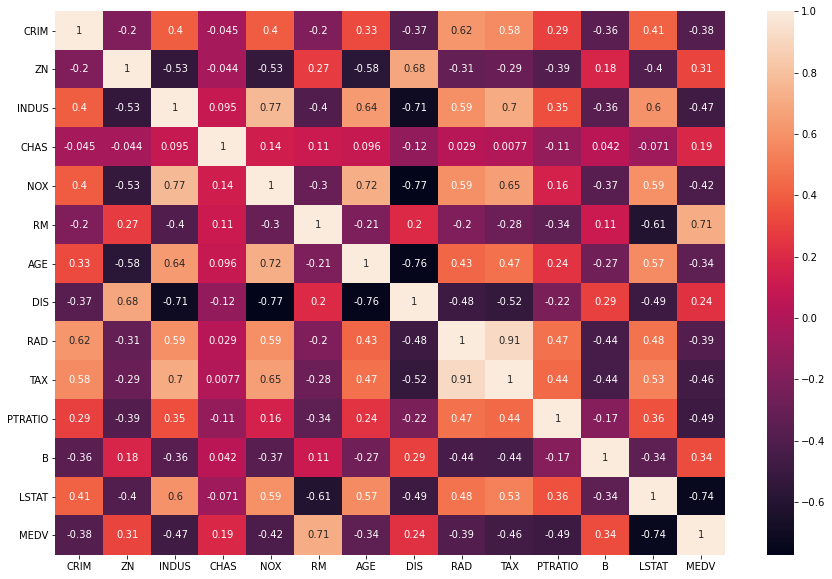

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True)

### Inference
- LSTAT has the **highest negative correlation** with MEDV.
- RM has the **highest poitive correlation** with MEDV.
- There is a relatively **high positive correlation** between DIS and ZN, TAX and INDUS, TAX and NOX 
- There is a relatively **high negative correlation** between DIS and INDUS, DIS and NOX, DIS and AGE, LSTAT and RM
- DIS, CHAS is approximately no correlation with MEDV or **least correlation** with MEDV

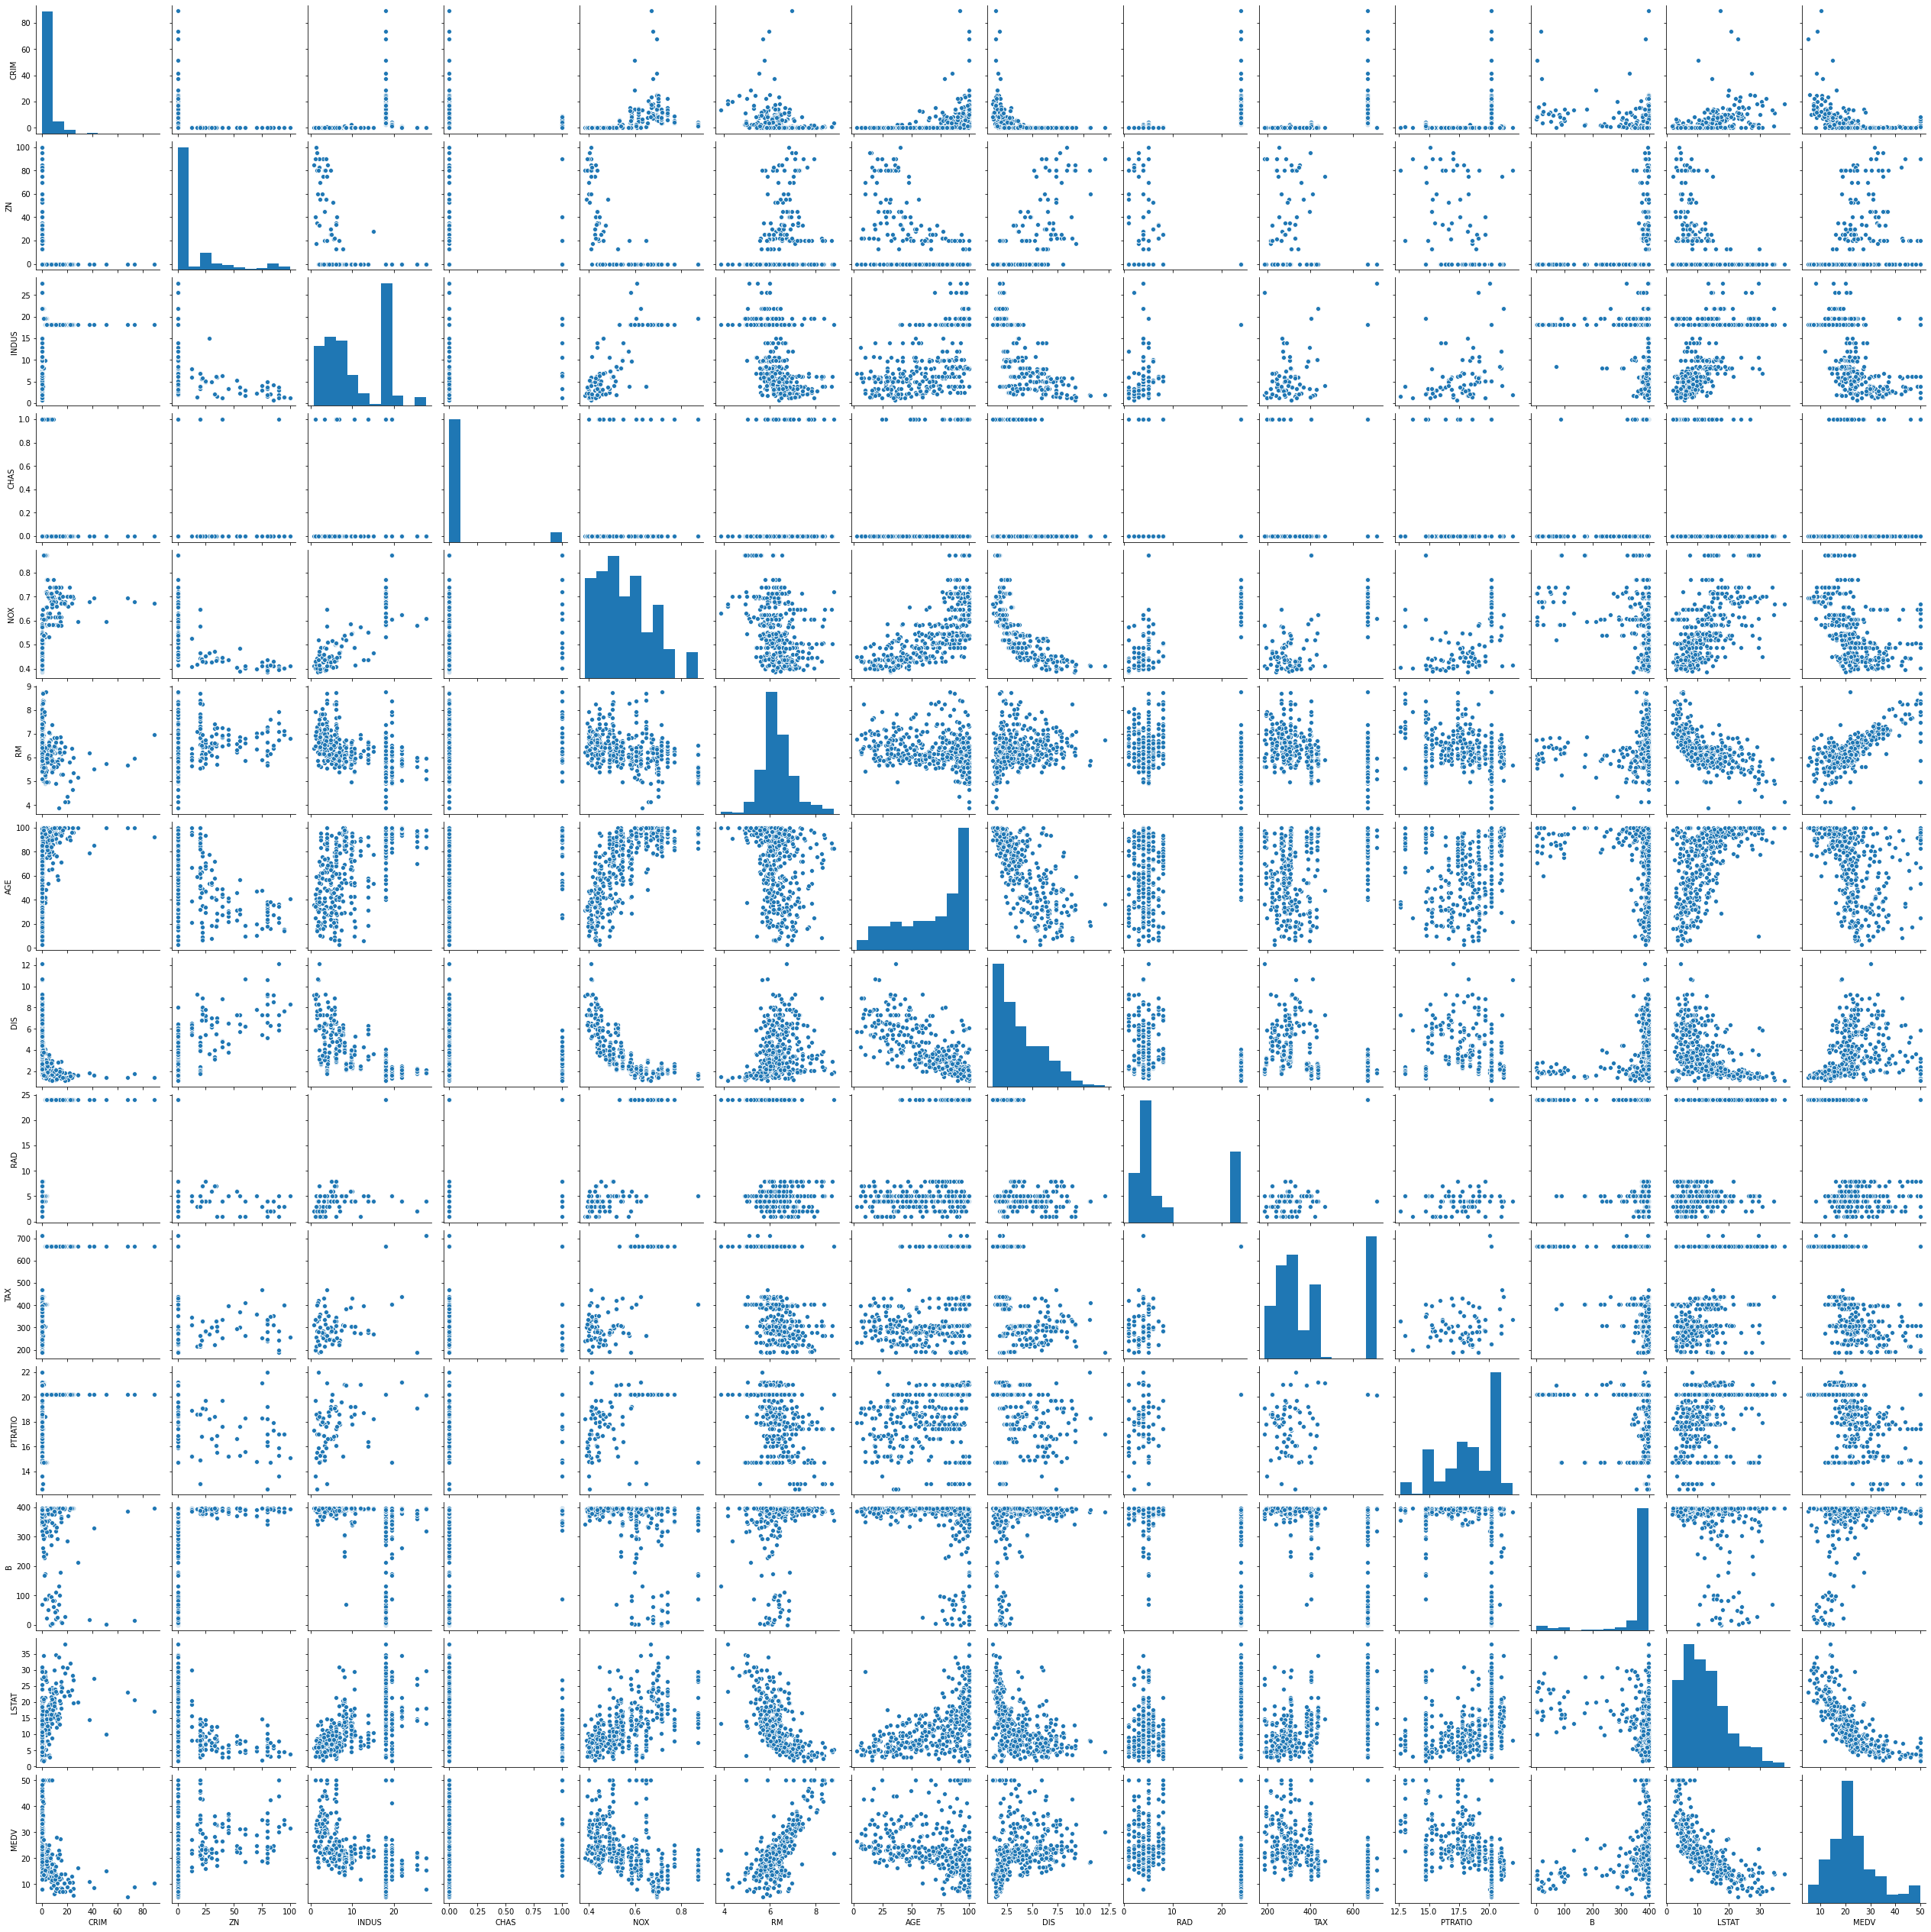

In [10]:
sns.pairplot(data=df)

### Inference : 
- Some features of dataset seems to have polynomial relation (curve-linear relationship), like MEDV and LSTAT etc.
- MEDV and RM seems to have linear relationship 
- Data is not too dispersed.
- CHAS seems to have no relation. 

### Split data into x and y:

In [11]:
x = df.drop(['MEDV','CHAS'], axis=1)
x.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,15.02340,0.0,18.10,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
1,0.62739,0.0,8.14,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
2,0.03466,35.0,6.06,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
3,7.05042,0.0,18.10,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
4,0.72580,0.0,8.14,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28


In [12]:
y = df['MEDV']
y.head()

0    12.0
1    19.9
2    19.4
3    13.4
4    18.2
Name: MEDV, dtype: float64

### Split into test and training set (70-30 ratio)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [14]:
print("Dataset shape:", df.shape)
print("Input Features shape: ", x_train.shape, y_train.shape)
print("Output Features shape: ", x_test.shape, y_test.shape)

Dataset shape: (404, 14)
Input Features shape:  (282, 12) (282,)
Output Features shape:  (122, 12) (122,)


<h2 align='center'> RandomForest </h2>

In [15]:
from sklearn.ensemble import RandomForestRegressor

### Training Model

In [16]:
rf = RandomForestRegressor(n_estimators= 1000, random_state= 42)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

### Prediction on Training and Test set

In [17]:
train_pred = rf.predict(x_train)
pred = rf.predict(x_test)

#### Accuracy on Training and Test dataset

In [18]:
from sklearn.metrics import r2_score, mean_squared_error

In [19]:
print("Training Accuracy: ", r2_score(y_train, train_pred))
print("Test Accuracy: ", r2_score(y_test, pred))

Training Accuracy:  0.9742385340697854
Test Accuracy:  0.8169021655356573


* AS Training Accuracy is more than Test Accuracy, ie Model seems to be  Overfitted

#### RMSE Value on Training and Test Dataset 

In [20]:
print("RMSE on Training Data: ", np.sqrt(mean_squared_error(y_train, train_pred)))
print("RMSE On Test Data: ", np.sqrt(mean_squared_error(y_test, pred)))

RMSE on Training Data:  1.525532150891695
RMSE On Test Data:  3.797843249383172


* The RMSE on Test data is much higher than Training Dataset

### Vizualising Results 

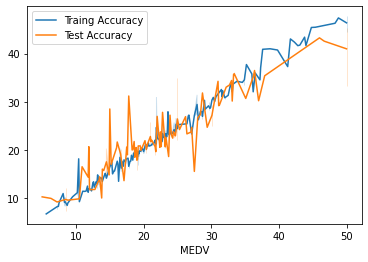

In [21]:
sns.lineplot(y_train, train_pred, label='Traing Accuracy')
sns.lineplot(y_test, pred, label = 'Test Accuracy')
plt.show()

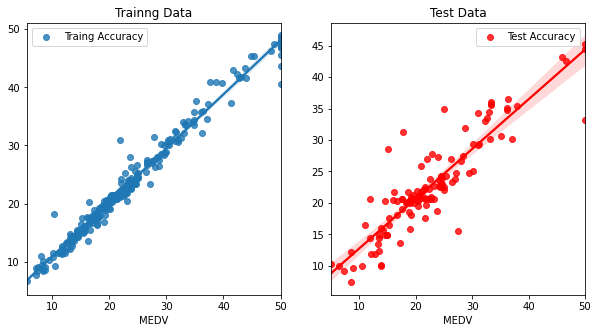

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.regplot(y_train, train_pred, label='Traing Accuracy')
plt.title("Trainng Data")
plt.legend()

plt.subplot(1,2,2)
sns.regplot(y_test, pred, label='Test Accuracy', color='r')
plt.title("Test Data")
plt.legend()

plt.show()

### Hyper-parameter tunning
* Tried to reduce RMSE Value 
* Tried to reduce the difference of training and test dataset

In [23]:
rf1 = RandomForestRegressor(n_estimators= 100, 
                            max_depth=12 , max_features=5 , min_samples_split=3, max_leaf_nodes = 120,
                            random_state= 42)
# Training Model
rf1.fit(x_train, y_train)

# Prediction 
rf1_pred_train = rf1.predict(x_train)
rf1_pred = rf1.predict(x_test)

#### Accuracy on Training and Test Dataset 

In [24]:
print("Training Accuracy: ", r2_score(y_train, rf1_pred_train))
print("Test Accuracy: ", r2_score(y_test, rf1_pred))

Training Accuracy:  0.9741692002099456
Test Accuracy:  0.8825040085913994


- By Hper-parameter tunning, Accuracy on Test set increases

In [25]:
print("RMSE on Training Data: ", np.sqrt(mean_squared_error(y_train, rf1_pred_train)))
print("RMSE On Test Data: ", np.sqrt(mean_squared_error(y_test, rf1_pred)))

RMSE on Training Data:  1.5275836638131846
RMSE On Test Data:  3.042334462587337


- The RMSE Value decreases 

### Visualising Results 

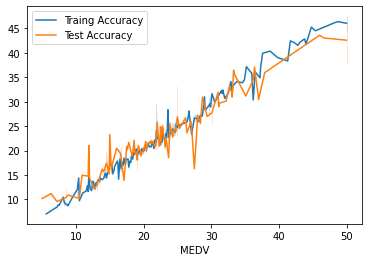

In [26]:
sns.lineplot(y_train, rf1_pred_train, label='Traing Accuracy')
sns.lineplot(y_test, rf1_pred, label = 'Test Accuracy')
plt.show()

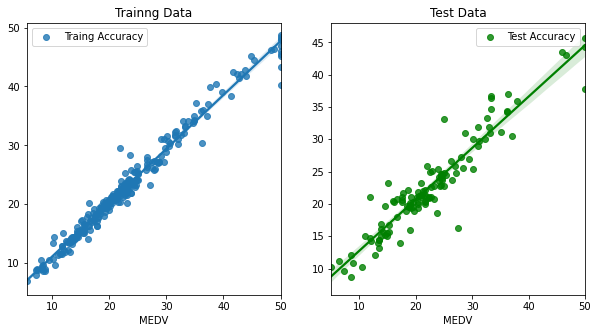

In [27]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.regplot(y_train, rf1_pred_train, label='Traing Accuracy')
plt.title("Trainng Data")
plt.legend()

plt.subplot(1,2,2)
sns.regplot(y_test, rf1_pred, label='Test Accuracy', color='g')
plt.title("Test Data")
plt.legend()

plt.show()

<h2 align='center'> Gradient Boost </h2>

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

#### Training Model 

In [29]:
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)

GradientBoostingRegressor()

#### Prediction on Test and Training set 

In [30]:
gb_pred_train = gb.predict(x_train)
gb_pred = gb.predict(x_test)

#### Accuracy on Training and Test set 

In [31]:
print("Training Accuracy: ", r2_score(y_train, gb_pred_train))
print("Test Accuracy: ", r2_score(y_test, gb_pred))

Training Accuracy:  0.9865970720471431
Test Accuracy:  0.8555379542997381


* Accuracy on Training Data is much higher than Test set

#### RMSE Value on Training and Test Dataset 

In [32]:
print("RMSE On Trainng Data: ",np.sqrt(mean_squared_error(y_train, gb_pred_train)))
print("RMSE On Test Data: ", np.sqrt(mean_squared_error(y_test, gb_pred)))

RMSE On Trainng Data:  1.1003628518049067
RMSE On Test Data:  3.3734347337458073


* The diffrenece of RMSE On Test data and Training Data is High

### Visualising Results 

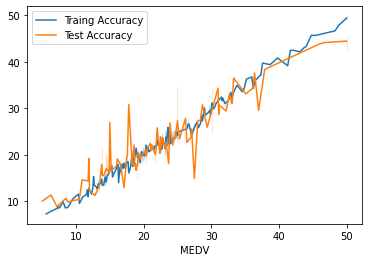

In [33]:
sns.lineplot(y_train, gb_pred_train, label='Traing Accuracy')
sns.lineplot(y_test, gb_pred, label = 'Test Accuracy')
plt.show()

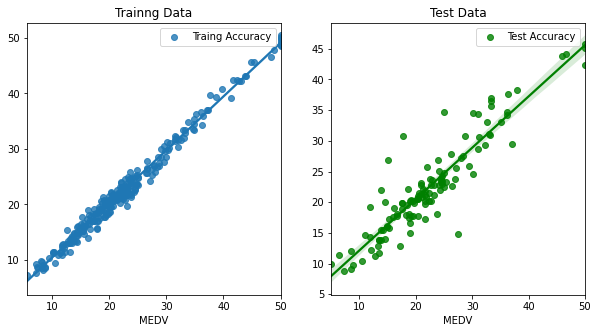

In [34]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.regplot(y_train, gb_pred_train, label='Traing Accuracy')
plt.title("Trainng Data")
plt.legend()

plt.subplot(1,2,2)
sns.regplot(y_test, gb_pred, label='Test Accuracy', color='g')
plt.title("Test Data")
plt.legend()

plt.show()

### Hyper-parameter Tuning 

* Tried to reduce RMSE Value 
* Tried to reduce the difference of training and test dataset

In [35]:
gb2 = GradientBoostingRegressor(n_estimators = 250, 
                                learning_rate=0.1, max_depth=5, max_features=5, max_leaf_nodes=14,
                                random_state=42, subsample=0.9, min_samples_split=3
                               )
gb2.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, max_features=5, max_leaf_nodes=14,
                          min_samples_split=3, n_estimators=250,
                          random_state=42, subsample=0.9)

####  Prediction on Test and Training Set

In [36]:
gb2_pred_train = gb2.predict(x_train)
gb2_pred = gb2.predict(x_test)

#### Accuracy on Training and Test Set 

In [37]:
print("Training Accuracy: ", r2_score(y_train, gb2_pred_train))
print("Test Accuracy: ", r2_score(y_test, gb2_pred))

Training Accuracy:  0.9998490404182646
Test Accuracy:  0.8943417267829096


* There is Huge Difference in Training and Test set Accuracy

#### RMSE Value on Training and Test Set 

In [38]:
print("RMSE On Trainng Data: ",np.sqrt(mean_squared_error(y_train, gb2_pred_train)))
print("RMSE On Test Data: ", np.sqrt(mean_squared_error(y_test, gb2_pred)))

RMSE On Trainng Data:  0.1167794486813066
RMSE On Test Data:  2.885009092986362


* RMSE Value decreases by Hyper-parameter Tunning

### Visualising Results 

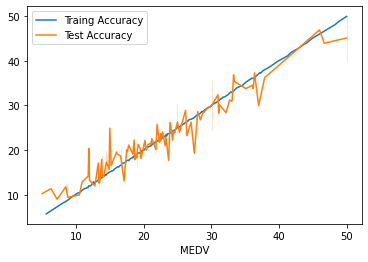

In [39]:
sns.lineplot(y_train, gb2_pred_train, label='Traing Accuracy')
sns.lineplot(y_test, gb2_pred, label = 'Test Accuracy')
plt.show()

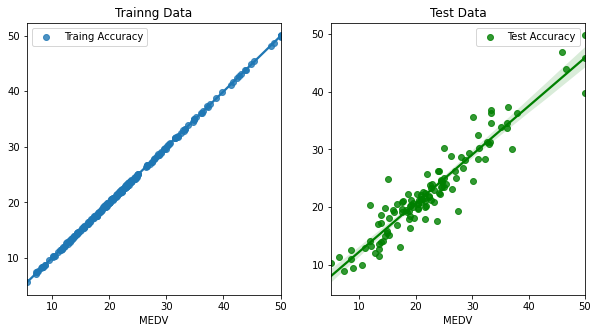

In [40]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.regplot(y_train, gb2_pred_train, label='Traing Accuracy')
plt.title("Trainng Data")
plt.legend()

plt.subplot(1,2,2)
sns.regplot(y_test, gb2_pred, label='Test Accuracy', color='g')
plt.title("Test Data")
plt.legend()

plt.show()

<h2 align='center'> XG-Boost </h2>

In [41]:
import xgboost as xgb

#### Training Model 

In [42]:
xg = xgb.XGBRegressor(n_estimators = 250, learning_rate=0.1)
xg.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=250, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

#### Prediction on Test and Training Set 

In [43]:
xg_pred_train = xg.predict(x_train)
xg_pred = xg.predict(x_test)

#### Accuracy on Training and Test Set 

In [44]:
print("Training Accuracy: ", r2_score(y_train, xg_pred_train))
print("Test Accuracy: ", r2_score(y_test, xg_pred))

Training Accuracy:  0.9999933829961545
Test Accuracy:  0.8787717480969575


* Test set accuracy is lesser than Training set accuracy 

#### RMSE Value on Training and Test Set 

In [45]:
print("RMSE On Trainng Data: ",np.sqrt(mean_squared_error(y_train, xg_pred_train)))
print("RMSE On Test Data: ", np.sqrt(mean_squared_error(y_test, xg_pred)))

RMSE On Trainng Data:  0.024449319292971915
RMSE On Test Data:  3.090276599708286


* RMSE Value on Test data is high


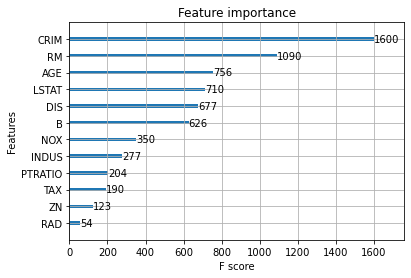

In [46]:
xgb.plot_importance(xg)

### Visualising Results 

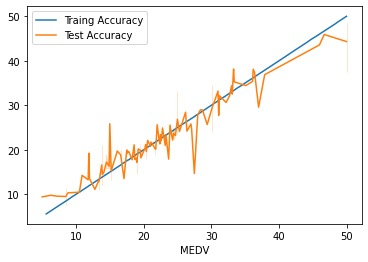

In [47]:
sns.lineplot(y_train, xg_pred_train, label='Traing Accuracy')
sns.lineplot(y_test, xg_pred, label = 'Test Accuracy')
plt.show()

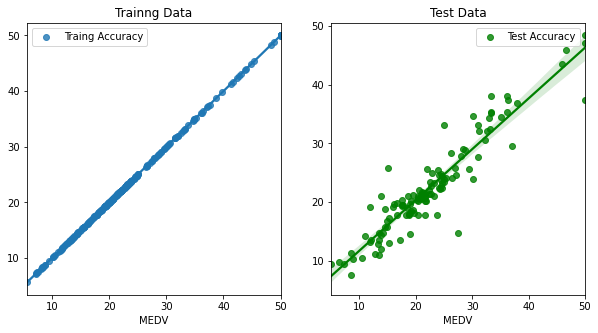

In [48]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.regplot(y_train, xg_pred_train, label='Traing Accuracy')
plt.title("Trainng Data")
plt.legend()

plt.subplot(1,2,2)
sns.regplot(y_test, xg_pred, label='Test Accuracy', color='g')
plt.title("Test Data")
plt.legend()

plt.show()

### Hyper-parameter tunning

In [49]:
xg2 = xgb.XGBRegressor(max_depth=5, n_estimators = 250, learning_rate=0.1,
                       colsample_bytree=0.6, gamma = 0.1, reg_alpha = 1, subsample = 0.9,
                       n_jobs = -1, random_state =42)

xg2.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=250, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

#### Prediction on Test and Training Set 

In [50]:
xg2_pred_train = xg2.predict(x_train)
xg2_pred = xg2.predict(x_test)

#### Accuracy on Training and Test Set 

In [51]:
print("Training Accuracy: ", r2_score(y_train, xg2_pred_train))
print("Test Accuracy: ", r2_score(y_test, xg2_pred))

Training Accuracy:  0.9992297317761369
Test Accuracy:  0.8876150553532173


#### RMSE Value on Training and Test Set 

In [52]:
print("RMSE On Trainng Data: ",np.sqrt(mean_squared_error(y_train, xg2_pred_train)))
print("RMSE On Test Data: ", np.sqrt(mean_squared_error(y_test, xg2_pred)))

RMSE On Trainng Data:  0.2637892358116185
RMSE On Test Data:  2.975428372575827


* RMSE Values decreases

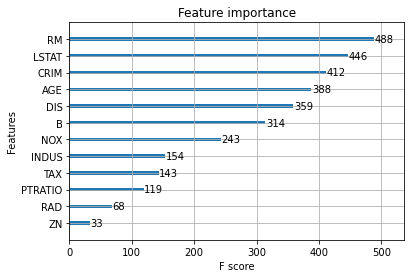

In [53]:
xgb.plot_importance(xg2)

### Visualising Results 

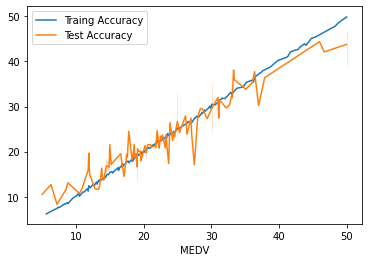

In [54]:
sns.lineplot(y_train, xg2_pred_train, label='Traing Accuracy')
sns.lineplot(y_test, xg2_pred, label = 'Test Accuracy')
plt.show()

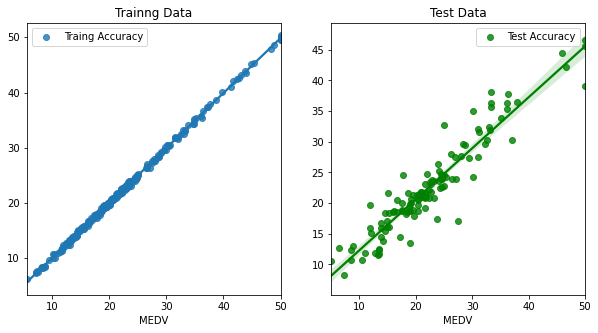

In [55]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.regplot(y_train, xg2_pred_train, label='Traing Accuracy')
plt.title("Trainng Data")
plt.legend()

plt.subplot(1,2,2)
sns.regplot(y_test, xg2_pred, label='Test Accuracy', color='g')
plt.title("Test Data")
plt.legend()

plt.show()

<h1 align='center'> Test- Dataset </h1>

In [56]:
test = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Boston_Housing/Testing_set_boston.csv')
test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
1,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
2,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
3,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
4,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27


#### Shape of Test Dataset 

In [57]:
test.shape

(102, 13)

- Training Dataset comprises  observations(rows) and 13 features(columns).
- All 13 are input variables. 

#### Drop Irrelevent Column from Test data

In [58]:
t = test.drop('CHAS', axis=1)
t.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.09178,0.0,4.05,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
1,0.05644,40.0,6.41,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
2,0.10574,0.0,27.74,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
3,0.09164,0.0,10.81,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
4,5.09017,0.0,18.10,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27


### Predicting Value Using Random-Forest 

In [59]:
ypred = rf1.predict(t)
target = []
for i in ypred:
    target.append(float(i))
#print(target)

In [60]:
result = pd.DataFrame(ypred) 
result.index = test.index 
result.columns = ["prediction"]
result.to_csv("Prediction_results_RandomForest.csv",index=False)

In [61]:
pd.read_csv('Prediction_results_RandomForest.csv')

,prediction
0,23.567798
1,30.479555
2,15.738398
3,23.593891
4,17.430157
...,...
97,11.757617
98,11.996650
99,12.934538
100,20.998225


<h1 align='center'> RMSE Value on Test Dataset : 3.007882 </h1>

### Predicting Values Using Gradient Boost

In [62]:
ypred = gb2.predict(t)
target = []
for i in ypred:
    target.append(float(i))
#print(target)

In [63]:
result = pd.DataFrame(ypred) 
result.index = test.index 
result.columns = ["prediction"]
result.to_csv("Prediction_results_GBBoost.csv",index=False)

In [64]:
pd.read_csv('Prediction_results_GBBoost.csv')

,prediction
0,24.535865
1,32.596453
2,16.227138
3,23.823459
4,16.863223
...,...
97,10.224058
98,9.608274
99,13.827891
100,20.869000


<h1 align='center'> RMSE Value on Test Dataset : 2.596806 </h1>

### Prediction Using XG-Boost

In [65]:
ypred = xg2.predict(t)
target = []
for i in ypred:
    target.append(float(i))
#print(target)

In [66]:
result = pd.DataFrame(ypred) 
result.index = test.index 
result.columns = ["prediction"]
result.to_csv("Prediction_results_XGBoost.csv",index=False)

In [67]:
pd.read_csv('Prediction_results_XGBoost.csv')

,prediction
0,24.259342
1,31.841534
2,16.670021
3,23.567692
4,17.730522
...,...
97,10.259872
98,10.929669
99,11.010766
100,21.488882


<h1 align='center'> RMSE Value on Test Dataset : 3.079001 </h1>

## Conclusion :

<hr>

### **Results:**

- RandomForest: 3.007
- Gradient Boost:  2.597
- XG Boost: 3.079

By Gradient Boost we got the Least RMSE on Test Dataset ie, It is more accurate in Predicting the median value of owner-occupied homes